# Raport

I'm working on the Heart Attack dataset.
Short description of variables:
* `age`: The person's age in years
* `sex`: The person's sex
  * 1: male
  * 0: female
* `cp`: chest pain type
  * 0: asymptomatic
  * 1: atypical angina
  * 2: non-anginal pain
  * 3: typical angina
* `trtbps`: The person's resting blood pressure (mm Hg on admission to the hospital)
* `chol`: The person's cholesterol measurement in mg/dl
* `fbs`: The person's fasting blood sugar (> 120 mg/dl)
  * 1: true
  * 0: false
* `restecg`: Resting electrocardiographic measurement
  * 0: showing probable or definite left ventricular hypertrophy by Estes' criteria
  * 1: normal
  * 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* `thalachh`: The person's maximum heart rate achieved
* `exng`: Exercise induced angina
  * 1: true
  * 0: false
* `oldpeak`: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)
* `slp`: the slope of the peak exercise ST segment
  * 0: downsloping
  * 1: flat
  * 2: upsloping
* `caa`: The number of major vessels (0-3) colored by fluoroscopy
* `thall`: Results of the blood flow observed via the radioactive dye
  * 0: NULL (dropped from the dataset previously)
  * 1: fixed defect (no blood flow in some part of the heart)
  * 2: normal blood flow
  * 3: reversible defect (a blood flow is observed but it is not normal)
* `output`: Heart disease (target)
  * 0: disease
  * 1: no disease

## 3.
For the XGBoost model and the two random observations, the explanations seem rather stable. In both cases, the first few most important variables are the same with a simliar order of magnitude. Explanations of the less important variables vary as there is a random factor in the lime method. For both cases we printed 3 different evaluations on different random seeds each.

![](https://drive.google.com/uc?export=view&id=17UAW5oQGXAdW8GMywmQAPttFWc1qXg2L)
![](https://drive.google.com/uc?export=view&id=1jpdroMi6sdpNaCHhelVoAHgVS8RUvewW)
![](https://drive.google.com/uc?export=view&id=1UtDnLeO-BuWmU7eYuH3ULZiYUqfjhnfi)
![](https://drive.google.com/uc?export=view&id=1HPTUtCI7WqDNPxfaePz_iIQNS4MvOtTP)
![](https://drive.google.com/uc?export=view&id=1kHrVUCQwhYSLfPaKtT-Bhto3YArFCJS_)
![](https://drive.google.com/uc?export=view&id=1KbbrJ0PRG6GhtdrU7xhdXD20rMcinVo9)

## 4.
Below one can find shap values for these two cases. The results are quite similar, however they differ. For instance, in the first case (regardless of random seed) first 3 variables are `caa` (positive lime value), `oldpeak` (negative), `cp_0` (positive). The most important variables according to Shapley's method are `caa`, `cp_0` and `thall_2`. In the second case the most important variables are `caa` and `oldpeak` in lime and shap methods, respectively. Despite these slight discrepancies, the direction and magnitude of the variables are similar.

The main difference is that lime method presents results in more understandable, human-friendly way as it distinguish significance of features in the explainable space (different for every problem). Shap method is more black-boxed.

![](https://drive.google.com/uc?export=view&id=1SDwY2yUXy5M56MOeamRf1VXvuhtf-9eN)

## 5. 
Below one can find lime evaluations for the aforementioned two cases based on the XGBoost and logistic regression models. The most important variable in all cases is still `caa` (positive value), latter variables differ a little bit. The direction and magnitude of the variables are close, it doesn't look like there are any systematic differences.

<h1><center>XGBoost</center></h1>

---
![](https://drive.google.com/uc?export=view&id=17UAW5oQGXAdW8GMywmQAPttFWc1qXg2L)
![](https://drive.google.com/uc?export=view&id=1jpdroMi6sdpNaCHhelVoAHgVS8RUvewW)

<h1><center>Logistic Regression</center></h1>

---
![](https://drive.google.com/uc?export=view&id=16ZGfpAvZs5TPCp8OwkOks15rvGrfR5bw)
![](https://drive.google.com/uc?export=view&id=1HHhwtJOvvsOWr13bqLsn9p-xDmjtNdQJ)


# Appendix

## Import packages

In [ ]:
!pip install dalex &>/dev/null
!pip install lime &>/dev/null

In [ ]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix,\
  ConfusionMatrixDisplay, f1_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
import dalex as dx
import lime

SEED = 42

## Load data

In [ ]:
!gdown 14RnHkHVRmZHdXF7_THt7arQzlzplKbF1

Downloading...
From: https://drive.google.com/uc?id=14RnHkHVRmZHdXF7_THt7arQzlzplKbF1
To: /content/heart.csv
100% 11.3k/11.3k [00:00<00:00, 15.1MB/s]


In [ ]:
df_raw = pd.read_csv('heart.csv')
df_raw.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data preprocessing

In [ ]:
df_raw.info() # only int and float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
print(df_raw.shape) # 303 observations, 14 variables (including one output class)
df_raw.describe()

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Based on the data and documentation from kaggle we should apply one-hot encoding transformation to the following variables: `cp`, `restecg`, `slp` and `thall`.

In [ ]:
df = pd.get_dummies(df_raw, columns=['cp', 'restecg', 'slp', 'thall'])
df.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,caa,output,...,restecg_0,restecg_1,restecg_2,slp_0,slp_1,slp_2,thall_0,thall_1,thall_2,thall_3
0,63,1,145,233,1,150,0,2.3,0,1,...,1,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,1,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
X = df.drop('output', axis=1)
y = df.output

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

With stratify argument we can assure than the proportion of values in the sample produced will be the same as the proportion of values in `y`.

Also, I decided to standardize features by removing the mean and scaling to unit variance. We don't want a feature that has a variance that is orders of magnitude larger than others.

For now I will use just train/test split, in the future I can extend it with train/val/test split if needed.

## Train a XGBoost model

In [ ]:
BST_model = xgb.XGBClassifier(random_state=SEED, max_depth=2).fit(X, y)

## lime

In [ ]:
pf_xgboost_classifier_default = lambda m, d: m.predict_proba(d)[:, 1]
explainer = dx.Explainer(BST_model, X, y, predict_function=pf_xgboost_classifier_default, label="GBM")

Preparation of a new explainer is initiated

  -> data              : 303 rows 23 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 303 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : GBM
  -> predict function  : <function <lambda> at 0x7fad8640d680> will be used
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.00365, mean = 0.544, max = 0.995
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.929, mean = 0.000168, max = 0.836
  -> model_info        : package xgboost

A new explainer has been created!


Check performance

In [ ]:
explainer.model_performance()#cutoff=y.mean())

,recall,precision,f1,accuracy,auc
GBM,0.933333,0.905882,0.919403,0.910891,0.978788


In [ ]:
observations = X.iloc[0:2]
explainer.predict(observations)

array([0.6567136, 0.9063615], dtype=float32)

In [ ]:
explanation = explainer.predict_surrogate(observations.iloc[0])
explanation.result

,variable,effect
0,caa <= 0.00,0.304894
1,oldpeak > 1.60,-0.259939
2,cp_0 <= 0.00,0.223835
3,0.00 < sex <= 1.00,-0.140507
4,thall_2 <= 0.00,-0.137948
5,exng <= 0.00,0.086477
6,thall_3 <= 0.00,0.072983
7,slp_2 <= 0.00,-0.051941
8,211.00 < chol <= 240.00,0.050300
9,restecg_1 <= 0.00,-0.044055


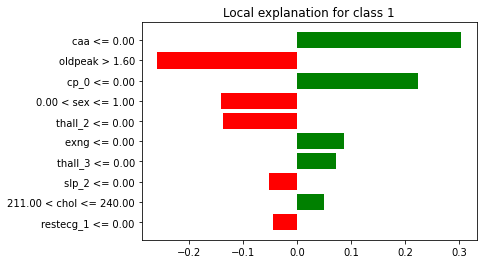

In [ ]:
explanation.plot()

In [ ]:
explanation = explainer.predict_surrogate(observations.iloc[1])
explanation.result

,variable,effect
0,caa <= 0.00,0.316980
1,oldpeak > 1.60,-0.245693
2,cp_0 <= 0.00,0.221430
3,0.00 < thall_2 <= 1.00,0.140979
4,0.00 < sex <= 1.00,-0.130140
5,exng <= 0.00,0.085343
6,thalachh > 166.00,0.082110
7,thall_3 <= 0.00,0.080869
8,slp_2 <= 0.00,-0.049159
9,0.00 < restecg_1 <= 1.00,0.043666


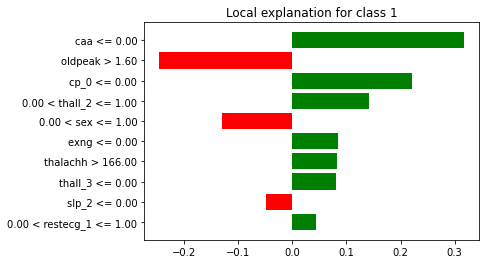

In [ ]:
explanation.plot()

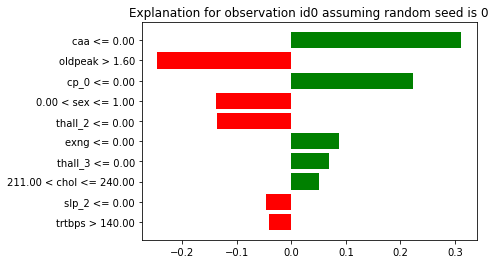

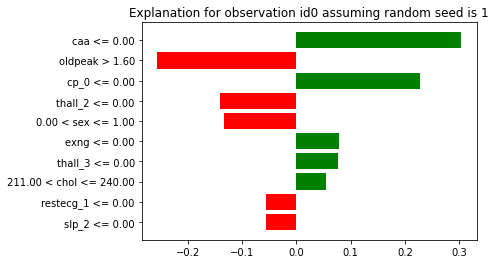

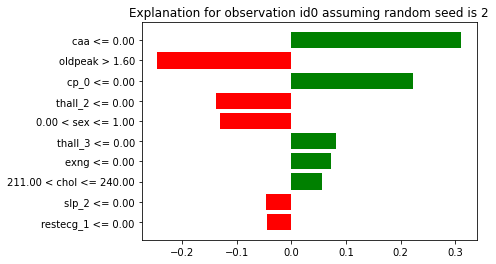

In [ ]:
import random
import matplotlib.pyplot as plt

for seed in range(3):
    random.seed(seed)
    np.random.seed(seed)
    exp = explainer.predict_surrogate(observations.iloc[0])
    exp.plot(return_figure=True)
    plt.title(f'Explanation for observation id0 assuming random seed is {seed}')

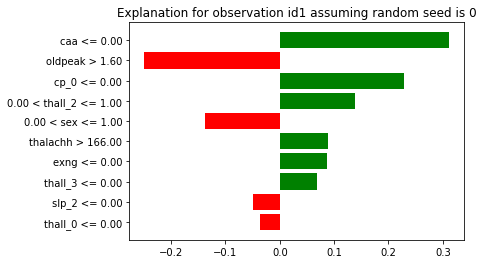

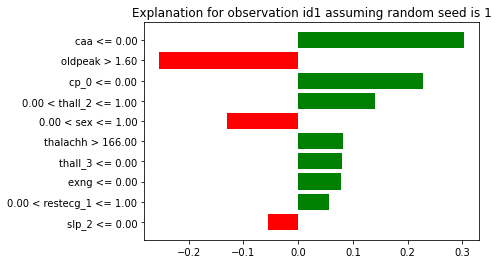

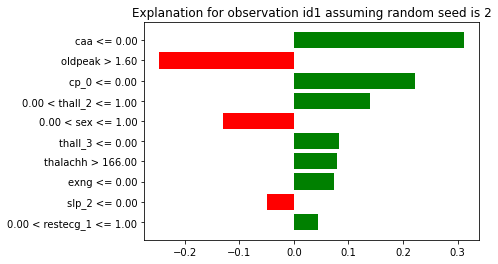

In [ ]:
for seed in range(3):
    random.seed(seed)
    np.random.seed(seed)
    exp = explainer.predict_surrogate(observations.iloc[1])
    exp.plot(return_figure=True)
    plt.title(f'Explanation for observation id1 assuming random seed is {seed}')

## shap

In [ ]:
shap_attributions = [explainer.predict_parts(observations.iloc[i], type="shap", label=f'obs {i}') for i in range(2)]

In [ ]:
shap_attributions[0].plot(shap_attributions[1])

## Logistic regression (another model)

In [ ]:
LR_model = LogisticRegression(class_weight='balanced', max_iter=1500, random_state=SEED).fit(X, y)
explainer = dx.Explainer(LR_model, X, y, predict_function=pf_xgboost_classifier_default, label="LR")

Preparation of a new explainer is initiated

  -> data              : 303 rows 23 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 303 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : LR
  -> predict function  : <function <lambda> at 0x7fad8640d680> will be used
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00132, mean = 0.525, max = 0.996
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.968, mean = 0.0193, max = 0.963
  -> model_info        : package sklearn

A new explainer has been created!


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [ ]:
explainer.model_performance()

,recall,precision,f1,accuracy,auc
LR,0.89697,0.860465,0.878338,0.864686,0.930435


In [ ]:
explainer.predict(X.iloc[0:2])

array([0.70362347, 0.87150404])

In [ ]:
explanation = explainer.predict_surrogate(observations.iloc[0])
explanation.result

,variable,effect
0,caa <= 0.00,0.239327
1,0.00 < sex <= 1.00,-0.206973
2,cp_0 <= 0.00,0.191550
3,oldpeak > 1.60,-0.178074
4,thall_3 <= 0.00,0.125455
5,exng <= 0.00,0.120947
6,cp_2 <= 0.00,-0.114008
7,thall_2 <= 0.00,-0.113947
8,trtbps > 140.00,-0.101531
9,cp_3 > 0.00,0.097347


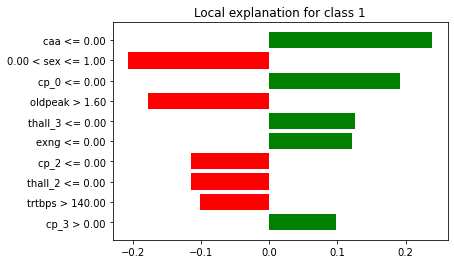

In [ ]:
explanation.plot()

In [ ]:
explanation = explainer.predict_surrogate(observations.iloc[1])
explanation.result

,variable,effect
0,caa <= 0.00,0.236131
1,0.00 < sex <= 1.00,-0.211330
2,cp_0 <= 0.00,0.199129
3,oldpeak > 1.60,-0.192161
4,thall_3 <= 0.00,0.127394
5,thalachh > 166.00,0.125223
6,exng <= 0.00,0.117254
7,0.00 < thall_2 <= 1.00,0.111422
8,0.00 < cp_2 <= 1.00,0.107264
9,cp_3 <= 0.00,-0.092974


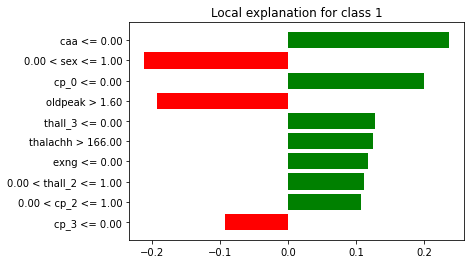

In [ ]:
explanation.plot()